# import various libraries

In [1]:
import numpy as np 
import pandas as pd
import imblearn
import smote
import seaborn as sns
 
import matplotlib.pyplot as plt
import re
import string
import keras
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
import requests 
from bs4 import BeautifulSoup 


from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, roc_auc_score, auc
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from keras.preprocessing.text import Tokenizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from keras.preprocessing import sequence
from sklearn.decomposition import LatentDirichletAllocation as LDA, NMF
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
import keras_tuner as kt

import nltk

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda

from keras.layers import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers import Embedding
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence

from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten, Embedding, LSTM, GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping



import warnings
warnings.filterwarnings('ignore')

# Project Task: Week 1
Class Imbalance Problem:
1.	Perform an EDA on the dataset.

•	See what a positive, negative, and neutral review looks like


In [2]:
train_data = pd.read_csv('C:/Users/Armand/Desktop/new work/AI-capstone project/project 1/Ecommerce/train_data.csv')

In [3]:
train_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [4]:
test_data_1 = pd.read_csv('C:/Users/Armand/Desktop/new work/AI-capstone project/project 1/Ecommerce/test_data.csv')
test_data_1.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [5]:
test_data_hidden = pd.read_csv('C:/Users/Armand/Desktop/new work/AI-capstone project/project 1/Ecommerce/test_data_hidden.csv')
test_data_hidden.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [6]:
test_data = pd.merge(test_data_1, test_data_hidden, on=['name','brand','categories','primaryCategories','reviews.date','reviews.text','reviews.title'], how='inner')
test_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [7]:
train_data.shape

(4000, 8)

In [8]:
test_data.shape

(1006, 8)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1006 non-null   object
 1   brand              1006 non-null   object
 2   categories         1006 non-null   object
 3   primaryCategories  1006 non-null   object
 4   reviews.date       1006 non-null   object
 5   reviews.text       1006 non-null   object
 6   reviews.title      1003 non-null   object
 7   sentiment          1006 non-null   object
dtypes: object(8)
memory usage: 70.7+ KB


In [11]:
train_data.describe()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,4000,4000,4000,4000,4000,4000,3990,4000
unique,23,1,23,4,638,3598,2606,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I bought this kindle for my 11yr old granddaug...,Great tablet,Positive
freq,676,4000,628,2600,99,4,100,3749


In [12]:
test_data.describe()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,1006,1006,1006,1006,1006,1006,1003,1006
unique,23,1,23,4,366,979,796,3
top,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I wanted to get something nice for my wife and...,Great tablet,Positive
freq,169,1006,169,682,26,4,22,943


In [13]:
train_data.isnull().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [14]:
test_data.isnull().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
sentiment            0
dtype: int64

In [15]:
train_data['sentiment']

0       Positive
1       Positive
2        Neutral
3       Positive
4       Positive
          ...   
3995    Positive
3996    Positive
3997    Positive
3998    Positive
3999    Positive
Name: sentiment, Length: 4000, dtype: object

In [16]:
test_data['sentiment']

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
1001    Positive
1002     Neutral
1003    Positive
1004    Positive
1005    Positive
Name: sentiment, Length: 1006, dtype: object

In [17]:
train_data['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [18]:
train_data['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

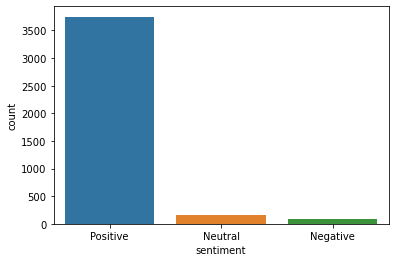

In [19]:
sns.countplot(x='sentiment', data=train_data)

the class is imbalance

# wordcloud

In [20]:
class WordCloudGeneration:
    def preprocessing(self, data):
        data = data.split(".")
        # convert all words to lowercase
        data = [item.lower() for item in data]
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        return preprocessed_data

    def create_word_cloud(self, final_data,title=""):
        final_data=self.preprocessing(final_data)

        wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="white").generate(final_data)
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(title,fontsize=40)
        plt.show()

        
wordcloud_generator = WordCloudGeneration()

In [21]:
Positive_Review_Text = ""
for review in  train_data[train_data["sentiment"]=="Positive"]["reviews.text"]:
    Positive_Review_Text += " " +review.lower()

Negative_Review_Text = ""
for review in  train_data[train_data["sentiment"]=="Negative"]["reviews.text"]:
    Negative_Review_Text += " " +review.lower()

Neutral_Review_Text = ""
for review in  train_data[train_data["sentiment"]=="Neutral"]["reviews.text"]:
    Neutral_Review_Text += " " +review.lower()

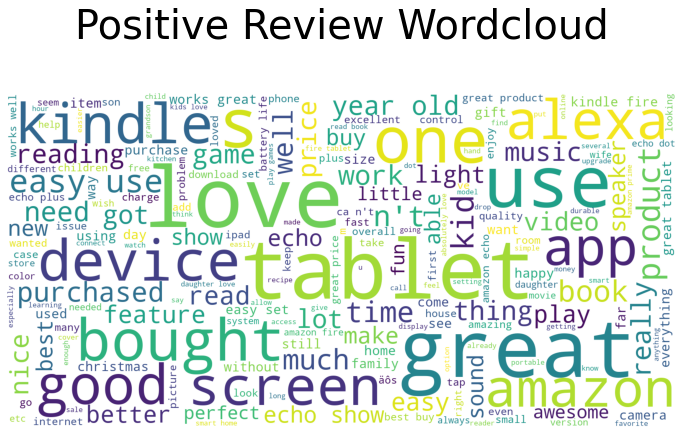

In [22]:
wordcloud_generator.create_word_cloud(Positive_Review_Text,"Positive Review Wordcloud\n")

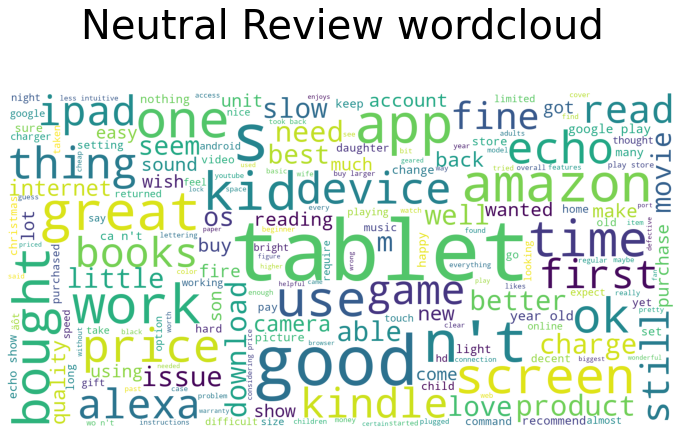

In [23]:
wordcloud_generator.create_word_cloud(Neutral_Review_Text,"Neutral Review wordcloud\n")

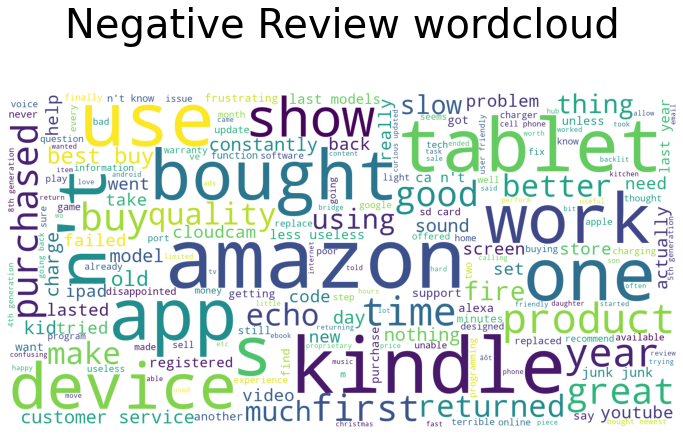

In [24]:
wordcloud_generator.create_word_cloud(Negative_Review_Text,"Negative Review wordcloud\n")

# 2.	Convert the reviews in Tf-Idf score

In [25]:
# converting into list for easy manipulation
train_reviews_list = train_data['reviews.text'].values
test_reviews_list = test_data['reviews.text'].values

In [26]:
print(len(train_reviews_list))
print(len(test_reviews_list))

4000
1006


In [27]:
# normalizing case
train_reviews_lower = [txt.lower() for txt in train_reviews_list]
test_reviews_lower = [txt.lower() for txt in test_reviews_list]

In [28]:
train_reviews_lower[2:4]

['just an average alexa option. does show a few things on screen but still limited.',
 'very good product. exactly what i wanted, and a very good price']

In [29]:
# tokenize
from nltk.tokenize import word_tokenize
print(word_tokenize(train_reviews_lower[0]))

['purchased', 'on', 'black', 'fridaypros', '-', 'great', 'price', '(', 'even', 'off', 'sale', ')', 'very', 'powerful', 'and', 'fast', 'with', 'quad', 'core', 'processors', 'amazing', 'soundwell', 'builtcons', '-amazon', 'ads', ',', 'amazon', 'need', 'this', 'to', 'subsidize', 'the', 'tablet', 'and', 'will', 'remove', 'the', 'adds', 'if', 'you', 'pay', 'them', '$', '15.inability', 'to', 'access', 'other', 'apps', 'except', 'the', 'ones', 'from', 'amazon', '.', 'there', 'is', 'a', 'way', 'which', 'i', 'was', 'able', 'to', 'accomplish', 'to', 'add', 'the', 'google', 'play', 'storenet', 'this', 'is', 'a', 'great', 'tablet', 'for', 'the', 'money']


In [30]:
train_reviews_tokens = [word_tokenize(sent) for sent in train_reviews_lower]
test_reviews_tokens = [word_tokenize(sent) for sent in test_reviews_lower]
print(train_reviews_tokens[0])

['purchased', 'on', 'black', 'fridaypros', '-', 'great', 'price', '(', 'even', 'off', 'sale', ')', 'very', 'powerful', 'and', 'fast', 'with', 'quad', 'core', 'processors', 'amazing', 'soundwell', 'builtcons', '-amazon', 'ads', ',', 'amazon', 'need', 'this', 'to', 'subsidize', 'the', 'tablet', 'and', 'will', 'remove', 'the', 'adds', 'if', 'you', 'pay', 'them', '$', '15.inability', 'to', 'access', 'other', 'apps', 'except', 'the', 'ones', 'from', 'amazon', '.', 'there', 'is', 'a', 'way', 'which', 'i', 'was', 'able', 'to', 'accomplish', 'to', 'add', 'the', 'google', 'play', 'storenet', 'this', 'is', 'a', 'great', 'tablet', 'for', 'the', 'money']


In [31]:
# remove stop words and punctuations

from nltk.corpus import stopwords
from string import punctuation

stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)

stop_nltk.remove("no")
stop_nltk.remove("not")
stop_nltk.remove("don")
stop_nltk.remove("won")

stop_final = stop_nltk + stop_punct + ["...", "``","''", "====", "must"]

def del_stop(sent):
    return [term for term in sent if term not in stop_final]



In [32]:
del_stop(train_reviews_tokens[1])

['purchased',
 'two',
 'amazon',
 'echo',
 'plus',
 'two',
 'dots',
 'plus',
 'four',
 'fire',
 'sticks',
 'hub',
 'philips',
 'hue',
 'lamp',
 'family',
 'christmas',
 '2017.',
 'i‚äôm',
 'happy',
 'purchases',
 'learning',
 'much',
 'alexa',
 'start',
 'daily',
 'routine',
 'alexa',
 'program',
 'whatever',
 'would',
 'like',
 'include',
 'news',
 'weather',
 'music',
 'horoscope',
 'also',
 'start',
 'day',
 'compliment',
 'think',
 'important',
 'alexa',
 'gave',
 'best',
 'chili',
 'recipe',
 'mean',
 'best',
 'it‚äôs',
 'called',
 'chili',
 'i.',
 'want',
 'husband',
 'use',
 'alexa',
 'stay',
 'organized',
 'business',
 'dates',
 'reminders',
 'way',
 'go']

In [33]:
train_reviews_clean = [del_stop(sent) for sent in train_reviews_tokens]
test_reviews_clean = [del_stop(sent) for sent in test_reviews_tokens]

In [34]:
train_reviews_clean = [" ".join(sent) for sent in train_reviews_clean]
test_reviews_clean = [" ".join(sent) for sent in test_reviews_clean]
train_reviews_clean[:2]

['purchased black fridaypros great price even sale powerful fast quad core processors amazing soundwell builtcons -amazon ads amazon need subsidize tablet remove adds pay 15.inability access apps except ones amazon way able accomplish add google play storenet great tablet money',
 'purchased two amazon echo plus two dots plus four fire sticks hub philips hue lamp family christmas 2017. i‚äôm happy purchases learning much alexa start daily routine alexa program whatever would like include news weather music horoscope also start day compliment think important alexa gave best chili recipe mean best it‚äôs called chili i. want husband use alexa stay organized business dates reminders way go']

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorizer = TfidfVectorizer(max_features = 5000)
vectorizer.fit(train_reviews_clean)

TfidfVectorizer(max_features=5000)

In [37]:
x_train = vectorizer.transform(train_reviews_clean)
x_test = vectorizer.transform(test_reviews_clean)

In [38]:
print(x_train.shape)
print(x_test.shape)

(4000, 4826)
(1006, 4826)


In [39]:
# encoding label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(train_data['sentiment'])
y_test = le.fit_transform(test_data['sentiment'])
print(y_train.shape)
print(y_test.shape)

(4000,)
(1006,)


# 3.	Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

In [40]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train, y_train)
print (clf.score(x_train, y_train))
print (clf.score(x_test, y_test))
y_pred=clf.predict(x_test)


0.93725
0.937375745526839


In [41]:
def show_metrics(true_vals,pred_vals):
    print(pd.DataFrame(confusion_matrix(true_vals,pred_vals),columns=["negative","neutral","positive"],index=["negative","neutral","positive"]))
    print("\n")
    print(classification_report(true_vals,pred_vals))
    show_roc(true_vals,pred_vals)

def show_roc(y_val,y_pred):
    lb.fit(y_val)
    y_val1 = lb.transform(y_val)
    y_pred1 = lb.transform(y_pred)
    print(f"WEIGHTED_ROC_AUC_SCORE: {roc_auc_score(y_val1, y_pred1, average='weighted'):.3f}")
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    lw=2
    for i in range(3):
        plt.plot(fpr[i], tpr[i], lw=lw,
                label='ROC curve of class Model (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of current Model')
    plt.legend(loc="lower right")
    plt.show()
    
lb = LabelBinarizer()    

Number of mislabeled points out of a total 1006 points : 63
          negative  neutral  positive
negative         0        0        24
neutral          0        0        39
positive         0        0       943


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       943

    accuracy                           0.94      1006
   macro avg       0.31      0.33      0.32      1006
weighted avg       0.88      0.94      0.91      1006

WEIGHTED_ROC_AUC_SCORE: 0.500


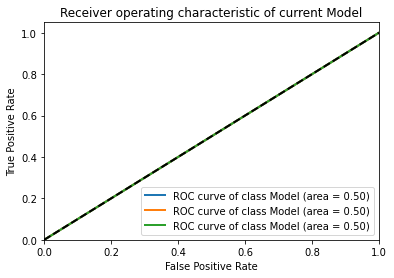

In [42]:
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_pred).sum()))
show_metrics(y_test,y_pred)

# Tackling Class Imbalance Problem

# 4.	Oversampling or undersampling can be used to tackle the class imbalance problem

In [43]:
train_data['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

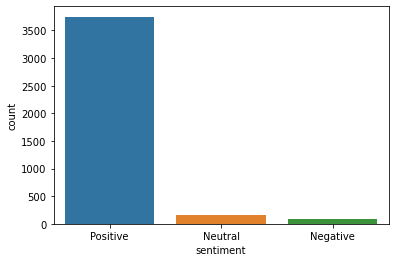

In [44]:
sns.countplot(x='sentiment', data=train_data)

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=.3,random_state=42)

# 5.	In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project

In [46]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train, y_train)
print (clf.score(x_train, y_train))
print (clf.score(x_test, y_test))
y_pred_1=clf.predict(x_test)

0.969385162601626
0.9653333333333334


Number of mislabeled points out of a total 3375 points : 117
          negative  neutral  positive
negative      1115        0         0
neutral          0     1107         4
positive        36       77      1036


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1115
           1       0.93      1.00      0.96      1111
           2       1.00      0.90      0.95      1149

    accuracy                           0.97      3375
   macro avg       0.97      0.97      0.97      3375
weighted avg       0.97      0.97      0.96      3375

WEIGHTED_ROC_AUC_SCORE: 0.974


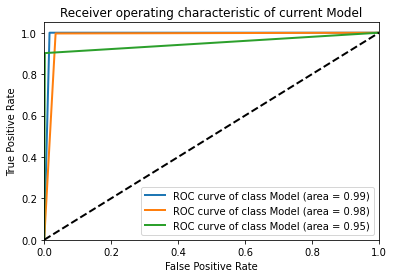

In [47]:
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_pred_1).sum()))
show_metrics(y_test,y_pred_1)

# 6.	Use Tree-based classifiers like Random Forest and XGBoost

In [48]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report

Random Forest Accuracy:  0.9961481481481481
Number of mislabeled points out of a total 3375 points : 13
          negative  neutral  positive
negative      1109        0         6
neutral          0     1107         4
positive         0        3      1146


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1115
           1       1.00      1.00      1.00      1111
           2       0.99      1.00      0.99      1149

    accuracy                           1.00      3375
   macro avg       1.00      1.00      1.00      3375
weighted avg       1.00      1.00      1.00      3375

WEIGHTED_ROC_AUC_SCORE: 0.997


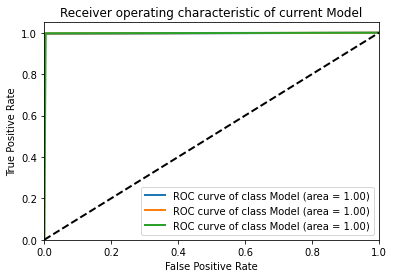

In [49]:
# random forest classifier
rfcl = RandomForestClassifier()
rfcl.fit(x_train,y_train)
y_rfcl = rfcl.predict(x_test)
print("Random Forest Accuracy: ", accuracy_score(y_rfcl,y_test))
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_rfcl).sum()))
show_metrics(y_test,y_rfcl)




XGBoost Accuracy:  0.9828148148148148
Number of mislabeled points out of a total 3375 points : 58
          negative  neutral  positive
negative      1109        0         6
neutral          1     1094        16
positive         4       31      1114


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1115
           1       0.97      0.98      0.98      1111
           2       0.98      0.97      0.98      1149

    accuracy                           0.98      3375
   macro avg       0.98      0.98      0.98      3375
weighted avg       0.98      0.98      0.98      3375

WEIGHTED_ROC_AUC_SCORE: 0.987


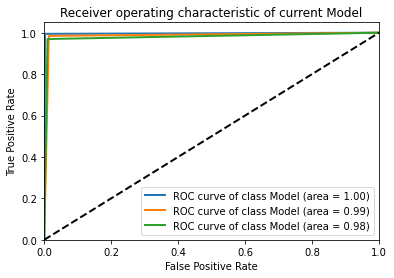

In [50]:
#XGBoost classifier
xgbcl = XGBClassifier()

xgbcl.fit(x_train,y_train)
y_xgbcl = xgbcl.predict(x_test)
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl,y_test))
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_xgbcl).sum()))
show_metrics(y_test,y_xgbcl)

# Project Task: Week 2
Model Selection:
1.	Apply multi-class SVM’s and neural nets.


In [51]:
# multiclass SVM

from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


#We’ll create two objects from SVM, to create two different classifiers;
#one with Polynomial kernel, and another one with RBF kernel:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_train,y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(x_train,y_train)

#calculate the efficiency of the two models
poly_pred = poly.predict(x_test)
rbf_pred = rbf.predict(x_test)


Number of mislabeled points out of a total 3375 points : 2
          negative  neutral  positive
negative      1115        0         0
neutral          0     1111         0
positive         0        2      1147


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1115
           1       1.00      1.00      1.00      1111
           2       1.00      1.00      1.00      1149

    accuracy                           1.00      3375
   macro avg       1.00      1.00      1.00      3375
weighted avg       1.00      1.00      1.00      3375

WEIGHTED_ROC_AUC_SCORE: 1.000


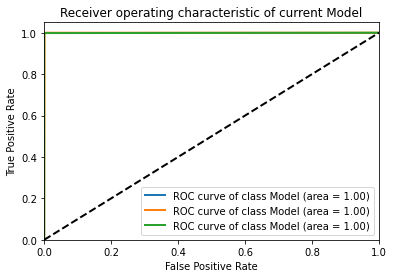

In [52]:
#calculate the accuracy and f1 scores for SVM with Polynomial kernel
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != poly_pred).sum()))
show_metrics(y_test,poly_pred)

Number of mislabeled points out of a total 3375 points : 72
          negative  neutral  positive
negative      1107        0         8
neutral          0     1051        60
positive         2        2      1145


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1115
           1       1.00      0.95      0.97      1111
           2       0.94      1.00      0.97      1149

    accuracy                           0.98      3375
   macro avg       0.98      0.98      0.98      3375
weighted avg       0.98      0.98      0.98      3375

WEIGHTED_ROC_AUC_SCORE: 0.984


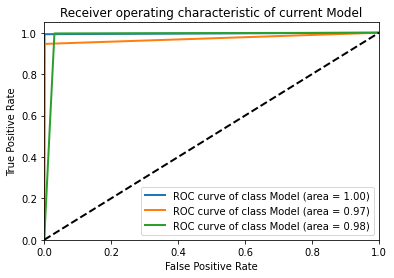

In [53]:
#accuracy and f1 scores for SVM with RBF kernel
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != rbf_pred).sum()))
show_metrics(y_test,rbf_pred)

# neural network

In [54]:
#neural nets.
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam



model = Sequential()
model.add(Dense(36, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(216, activation = "relu"))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(36, activation = "relu"))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

results = model.fit(
 x_train,y_train,
 epochs= 20,
 batch_size = 500,
 validation_data = (x_test, y_test)
)



Epoch 1/20
16/16 [==============================] - 3s 29ms/step - loss: 1.3207 - accuracy: 0.4543 - val_loss: 1.2022 - val_accuracy: 0.5561
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0484 - accuracy: 0.5356 - val_loss: 0.8242 - val_accuracy: 0.6764
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5999 - accuracy: 0.8609 - val_loss: 0.2886 - val_accuracy: 0.9730
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.1820 - accuracy: 0.9726 - val_loss: 0.0606 - val_accuracy: 0.9879
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.0521 - accuracy: 0.9888 - val_loss: 0.0260 - val_accuracy: 0.9938
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.0254 - accuracy: 0.9949 - val_loss: 0.0195 - val_accuracy: 0.9938
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.0151 - accuracy: 0.9976 - val_loss: 0.0165 - val_accuracy: 0.9947
Epoch 8/20
16

In [55]:
preds_array = model.predict(x_test)
pred_list = []
for i,pred in enumerate(preds_array):
    pred_list.append(pred.argmax())

106/106 [==============================] - 0s 1ms/step


Number of mislabeled points out of a total 3375 points : 17
          negative  neutral  positive
negative      1115        0         0
neutral          0     1111         0
positive         4       13      1132


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1115
           1       0.99      1.00      0.99      1111
           2       1.00      0.99      0.99      1149

    accuracy                           0.99      3375
   macro avg       0.99      1.00      0.99      3375
weighted avg       1.00      0.99      0.99      3375

WEIGHTED_ROC_AUC_SCORE: 0.996


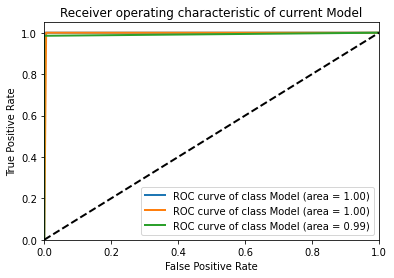

In [56]:
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != pred_list).sum()))
show_metrics(y_test,pred_list)

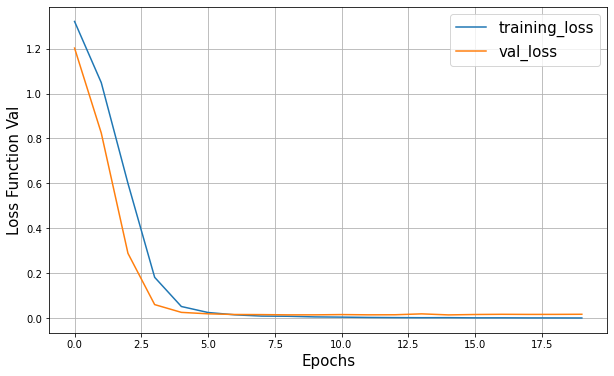

In [57]:
# Plot the training and validation accuracy, and the loss
plt.figure(figsize=(10,6))
plt.plot(results.epoch, results.history['loss'])
plt.plot(results.epoch, results.history['val_loss'])
plt.legend(['training_loss', 'val_loss'], fontsize=15)

plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Function Val', fontsize=15)
plt.grid('on')
plt.show()

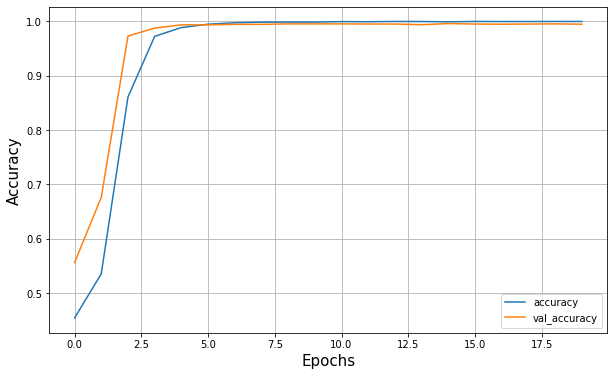

In [58]:
plt.figure(figsize=(10,6))
plt.plot(results.epoch, results.history['accuracy'])
plt.plot(results.epoch, results.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid('on')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

# 2.	Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.

In [59]:
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB


clf=MultinomialNB()
model = XGBClassifier(base_estimator=clf, n_estimators=2000)
model.fit(x_train,y_train)

[01:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_estimator=MultinomialNB(), base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, ...)

Number of mislabeled points out of a total 3375 points : 48
          negative  neutral  positive
negative      1106        0         9
neutral          1     1096        14
positive         4       20      1125


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1115
           1       0.98      0.99      0.98      1111
           2       0.98      0.98      0.98      1149

    accuracy                           0.99      3375
   macro avg       0.99      0.99      0.99      3375
weighted avg       0.99      0.99      0.99      3375

WEIGHTED_ROC_AUC_SCORE: 0.989


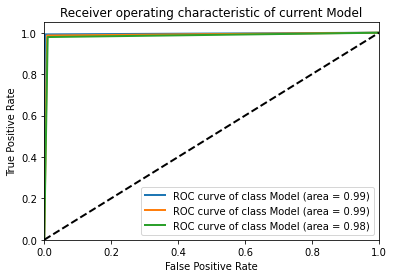

In [60]:
y_pred_2 = model.predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_pred_2).sum()))
show_metrics(y_test,y_pred_2)


# 3.	Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same

In [61]:
from textblob import TextBlob
train_data["sentiment"][:3].apply(lambda x: str(TextBlob(x).correct()))

0    Positive
1    Positive
2     Neutral
Name: sentiment, dtype: object

In [62]:
TextBlob(train_data["sentiment"][3]).words

WordList(['Positive'])

In [63]:
train_data['train_reviews_clean'] = train_reviews_clean
test_data['test_reviews_clean'] = test_reviews_clean

In [64]:
train_data['calculated'] = train_data['reviews.text'].apply(lambda x: (TextBlob(x).sentiment.polarity))
train_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,train_reviews_clean,calculated
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,purchased black fridaypros great price even sa...,0.363542
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,purchased two amazon echo plus two dots plus f...,0.458214
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral,average alexa option show things screen still ...,-0.140476
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,good product exactly wanted good price,0.690000
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,3rd one 've purchased 've bought one nieces no...,0.187500


<AxesSubplot:>

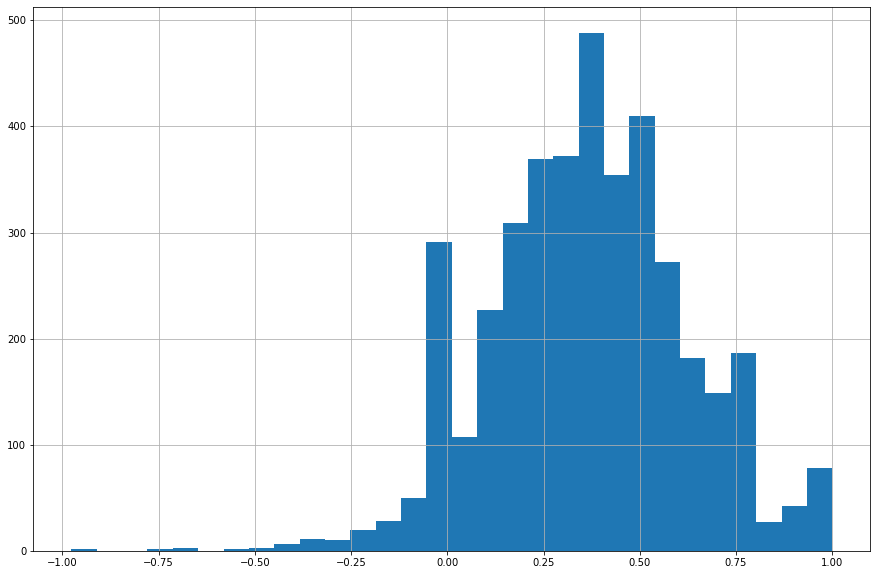

In [65]:
train_data['calculated'].hist(bins=30, figsize=(15, 10))

# Applying LSTM:
4.	Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)


In [66]:
# Convert the sentiments
train_data.sentiment.replace(('Positive','Negative','Neutral'),(1,0,2),inplace=True)
test_data.sentiment.replace(('Positive','Negative','Neutral'),(1,0,2),inplace=True)

train_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,train_reviews_clean,calculated
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,1,purchased black fridaypros great price even sa...,0.363542
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,1,purchased two amazon echo plus two dots plus f...,0.458214
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,2,average alexa option show things screen still ...,-0.140476
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,1,good product exactly wanted good price,0.690000
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,1,3rd one 've purchased 've bought one nieces no...,0.187500


In [67]:
x_train = train_data['train_reviews_clean']
x_test = test_data['test_reviews_clean']
y_train = train_data['sentiment']
y_test = test_data['sentiment']

In [68]:
from keras_preprocessing.sequence import pad_sequences
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 3
nb_epoch = 3


# Vectorize x_train and x_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #Considering only top 20000 words in the corpus
tokenizer.fit_on_texts(x_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

x_train_seq = pad_sequences(sequences_train, maxlen=maxlen)
x_test_seq = pad_sequences(sequences_test, maxlen=maxlen)


# One-Hot Encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('x_train shape:', x_train_seq.shape) #(27799, 100)
print('x_test shape:', x_test_seq.shape) #(3089, 100)
print('y_train shape:', y_train_seq.shape) #(27799, 2)
print('y_test shape:', y_test_seq.shape) #(3089, 2)

x_train shape: (4000, 100)
x_test shape: (1006, 100)
y_train shape: (4000, 3)
y_test shape: (1006, 3)


In [69]:
# Constructing a Simple LSTM
model1 = Sequential()
model1.add(Embedding(top_words, 128))
model1.add(LSTM(128)) 
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

# Compiling LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=["acc","AUC"])

model1.fit(x_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Model Evaluation
score = model1.evaluate(x_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
Total params: 2,691,971
Trainable params: 2,691,971
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
125/125 [==============================] - 18s 118ms/step - loss: 0.2020 - acc: 0.9327 - auc: 0.9555
Epoch 2/3
125/125 [==============================] - 15s 117ms/st

# Using GRU to predict classes

In [70]:


model = Sequential()
model.add(Embedding(top_words, 128))
model.add(GRU(128))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["acc","AUC"])
model.summary

# Compiling LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=["acc","AUC"])

model1.fit(x_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Model Evaluation
score = model1.evaluate(x_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/3
125/125 [==============================] - 15s 109ms/step - loss: 0.0813 - acc: 0.9535 - auc: 0.9909
Epoch 2/3
125/125 [==============================] - 14s 115ms/step - loss: 0.0619 - acc: 0.9695 - auc: 0.9946
Epoch 3/3
32/32 [==============================] - 2s 36ms/step - loss: 0.1523 - acc: 0.9483 - auc: 0.9730
Test loss : 0.1523
Test accuracy : 0.9483


# 5.	Compare the accuracy of neural nets with traditional ML based algorithms

neural network is the best model for this problem

# Topic Modeling:
7.	Cluster similar reviews.


In [71]:
import nltk
#nltk.download('wordnet')

def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [72]:
doc_complete = train_data["train_reviews_clean"]
doc_clean = [cleanText(doc).split() for doc in doc_complete]

In [73]:
import gensim
from gensim import corpora

In [74]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary<4708 unique tokens: ['able', 'access', 'accomplish', 'add', 'adds']...>


In [75]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 3),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 2),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 2),
 (35, 1)]

In [76]:
from gensim.models import LdaModel

In [77]:
NUM_TOPICS = 9
ldamodel = LdaModel(doc_term_matrix, num_topics=NUM_TOPICS, id2word=dictionary, passes=30)

In [78]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.042*"tablet" + 0.031*"old" + 0.028*"loves" + 0.027*"love" + 0.026*"great" + 0.025*"year" + 0.024*"bought" + 0.018*"kids" + 0.018*"fire" + 0.017*"easy"')

(1, '0.059*"easy" + 0.048*"use" + 0.020*"tablet" + 0.020*"great" + 0.019*"set" + 0.015*"product" + 0.013*"gift" + 0.012*"s" + 0.012*"love" + 0.012*"kids"')

(2, '0.038*"echo" + 0.027*"alexa" + 0.021*"great" + 0.021*"music" + 0.019*"show" + 0.019*"love" + 0.014*"home" + 0.014*"amazon" + 0.012*"sound" + 0.011*"s"')

(3, '0.046*"great" + 0.034*"tablet" + 0.029*"n" + 0.028*"t" + 0.027*"good" + 0.025*"not" + 0.021*"price" + 0.016*"would" + 0.016*"works" + 0.014*"product"')

(4, '0.027*"better" + 0.024*"like" + 0.022*"great" + 0.019*"screen" + 0.010*"size" + 0.010*"tablet" + 0.009*"much" + 0.009*"grandkids" + 0.008*"version" + 0.008*"could"')

(5, '0.023*"kindle" + 0.021*"t" + 0.020*"n" + 0.019*"s" + 0.018*"not" + 0.014*"screen" + 0.011*"much" + 0.010*"love" + 0.010*"books" + 0.010*"read"')

(6, '0.031*"tablet" + 0.028*"kindle" + 0.0

In [79]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [80]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,tablet,easy,echo,great,better,kindle,tablet,read,bought
1,old,use,alexa,tablet,like,t,kindle,kindle,one
2,loves,tablet,great,n,great,n,one,light,games
3,love,great,music,t,screen,s,fire,books,love
4,great,set,show,good,size,not,great,reading,old
5,year,product,love,not,tablet,screen,bought,book,apps
6,bought,gift,home,price,much,much,price,easy,tablet
7,kids,s,amazon,would,grandkids,love,everything,size,really
8,fire,love,sound,works,version,books,purchased,charge,play
9,easy,kids,s,product,could,read,gift,i,use


In [81]:
ldamodel.show_topic(0, topn = 20)

[('tablet', 0.04170599),
 ('old', 0.030577775),
 ('loves', 0.028060049),
 ('love', 0.026799072),
 ('great', 0.0259335),
 ('year', 0.025119903),
 ('bought', 0.023582578),
 ('kids', 0.018416122),
 ('fire', 0.018059677),
 ('easy', 0.016995467),
 ('got', 0.016166696),
 ('kindle', 0.015957352),
 ('one', 0.015271392),
 ('daughter', 0.013936038),
 ('use', 0.013236106),
 ('reader', 0.009673356),
 ('amazon', 0.008665143),
 ('grandson', 0.008088021),
 ('best', 0.007696993),
 ('s', 0.007536477)]